## Exploratory Individuals Models
Content:
- Training of differents models (without cross-validation and without hp tunning, only train ONE MODEL)
- Evaluation how the models work comparind different metrics (for example RME, MAE, custom compose metric) and visualization the results (plot true vs predict label and histogram of errors)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import xgboost
import lightgbm as ltb
from sklearn import datasets, linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### -1. Root repo

In [2]:
import os
# get actual path
actual_path = os.path.abspath(os.getcwd())

# divide each folder in the path in a list
# delete the last element to get the root path of the local folder
list_root_path = actual_path.split('\\')[:-1]

# join the list in a string with the root
root_path = '\\'.join(list_root_path)

# pararme en el root obtenido
os.chdir(root_path)

print('before: ', actual_path)
print('after: ', root_path)

before:  D:\Github-mi-repo\Discovery-ensembles-stackings-methods\discovery
after:  D:\Github-mi-repo\Discovery-ensembles-stackings-methods


###  0. Parameters

In [3]:
# parameters to dataset
path_data_folder = 'data'
path_data_example_1 = 'example1'

### 1. Load data

In [4]:
# path
path_data = path_data_folder + '/' + path_data_example_1

In [5]:
# load data
X_train = pd.read_csv(path_data + '/' + 'X_train.csv', index_col = 0)
y_train = pd.read_csv(path_data + '/' + 'y_train.csv', index_col = 0)

X_test = pd.read_csv(path_data + '/' + 'X_test.csv', index_col = 0)
y_test = pd.read_csv(path_data + '/' + 'y_test.csv', index_col = 0)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (800, 20)
y_train:  (800, 1)
X_test:  (200, 20)
y_test:  (200, 1)


### 2. Try models
- Try different models
- Models without changes in its parameters

In [6]:
# auxiliar functions
def evaluate_metrics(model, X, y_true):
    '''
    Evaluate rmse, mae, mean of rmse+mae.
    
    OBS: 
     - Inside the functions is called the method model.predict()
     - Calculate the metrics (using y_true vs y_predict) and save it in a dataframe
    '''
    # predict
    prediction = model.predict(X)
    
    # create a dataframe where the metrics are saved
    df_metrics = pd.DataFrame([], columns = ['metric_value'])
    
    
    #### rmse ####
    # calculate
    rmse = mean_squared_error(y_true = y_true,
                  y_pred = prediction,
                  squared = False)
    # save df
    df_metrics = df_metrics.append(pd.DataFrame([rmse], index = ['RMSE'], columns = ['metric_value']))
    print('RMSE: ', rmse)
    
    
    
    #### mae ####
    # calculate
    mae = mean_absolute_error(y_true = y_true,
                         y_pred = prediction)
    
    # save df
    df_metrics = df_metrics.append(pd.DataFrame([mae], index = ['MAE'], columns = ['metric_value']))
    print('MAE: ', mae)
    
    
    
    #### (rmse + mae) / 2 ####
    # calculate
    rmse_mae = (rmse + mae) / 2
    
    # save df
    df_metrics = df_metrics.append(pd.DataFrame([rmse_mae], index = ['RMSE_MAE'], columns = ['metric_value']))
    print('MEAN_RMSE_MAE: ', rmse_mae)
    
    
    return df_metrics


def evaluate_quality_models(model, X, y_true, df_metrics):
    '''
    Make 3 plots evaluating the quality of the models:
    1) Scatter plot between true and predicted values
    2) Histogram of errors (calcualing y_true - y_pred)
    3) Metrics of the models. (the metrics are saved in a dataframe)
    
    
    - df_metrics needs to have this structure (getting using the function evaluate_metrics)
                metric_value
    RMSE	    124.345780
    MAE	        100.801996
    RMSE_MAE	112.573888
    
    '''
    
    #y_pred = model.predict(X)  # some models return (N_observations, 1) and other models return (N_observations, )
    y_pred = model.predict(X).reshape(X.shape[0], 1)

    fig, axs = plt.subplots(1, 3, figsize = (20, 5))

    # plot scatter y_true vs y_pred
    axs[0].scatter(x = y_pred, y = y_true)
    axs[0].set_xlabel('y_pred', fontsize = 15)
    axs[0].set_ylabel('y_true', fontsize = 15)
    axs[0].set_title('y_true vs y_pred', fontsize = 20)


    # plot histogram errors, only the difference between real and predicted (y_true - y_pred)
    axs[1].hist(y_true - y_pred)
    axs[1].set_xlabel('Freq', fontsize = 15)
    axs[1].set_ylabel('Errors', fontsize = 15)
    axs[1].set_title('Histogram', fontsize = 20)


    # plot bar with the values of the metrics using the dataframe
    axs[2].grid()
    axs[2].bar(x = df_metrics.index, height = df_metrics['metric_value'])
    axs[2].set_xlabel('Metrics', fontsize = 15)
    axs[2].set_ylabel('Value', fontsize = 15)
    axs[2].set_title('Evaluate Metrics', fontsize = 20)


    plt.plot()  

### 2.1 Linear regression
- Linear regression works very well, this why the data is ficticius generated ussing a regression.
- On the other hand, models with more parameters works very bad because these models learn a lot of noise

RMSE:  0.10338775000322843
MAE:  0.07739007422484658
MEAN_RMSE_MAE:  0.0903889121140375


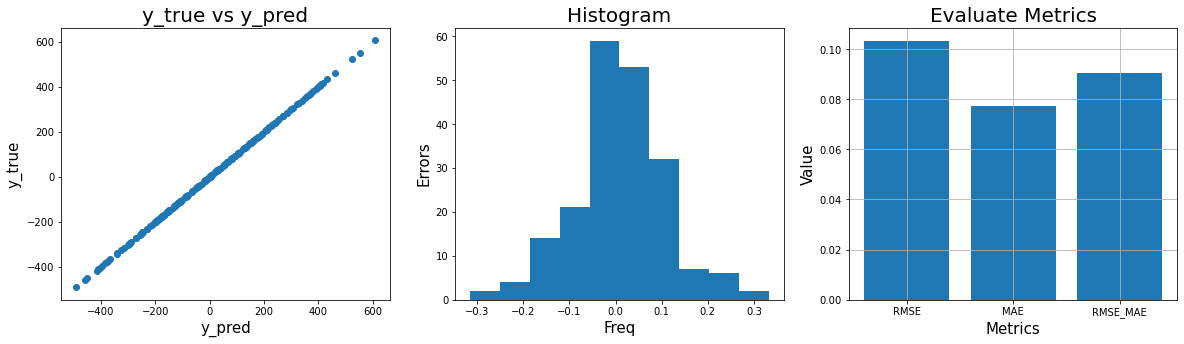

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

metrics_lr = evaluate_metrics(model = lr, 
                           X = X_test, 
                           y_true = y_test
                          )

evaluate_quality_models(model = lr, 
                        X = X_test, 
                        y_true = y_test, 
                        df_metrics = metrics_lr
                       )

### 2.2 Decision Tree

RMSE:  173.95837138355637
MAE:  139.35543041215064
MEAN_RMSE_MAE:  156.65690089785352


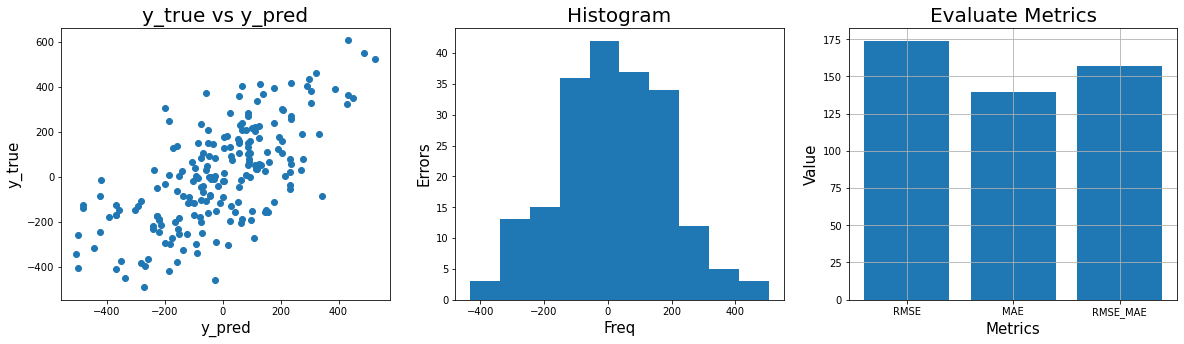

In [50]:
cart = DecisionTreeRegressor(random_state = 42)
cart.fit(X_train, y_train)

metrics_cart = evaluate_metrics(model = cart, 
                           X = X_test, 
                           y_true = y_test
                          )

evaluate_quality_models(model = cart, 
                        X = X_test, 
                        y_true = y_test, 
                        df_metrics = metrics_cart
                       )

### 2.3 Random Forest

C:\Users\JORTEGAL\AppData\Local\Temp/ipykernel_33820/3960736135.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RMSE:  114.32123189855736
MAE:  91.24105431647007
MEAN_RMSE_MAE:  102.78114310751371


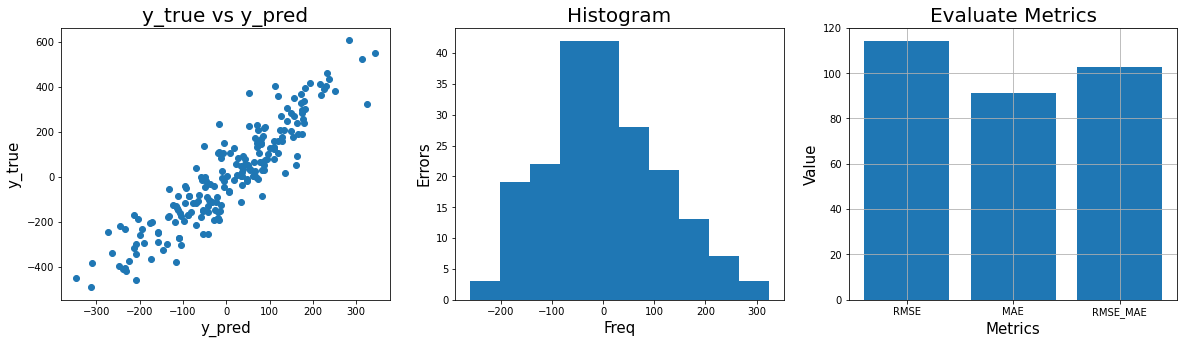

In [9]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

metrics_rf = evaluate_metrics(model = rf, 
                           X = X_test, 
                           y_true = y_test
                          )

evaluate_quality_models(model = rf, 
                        X = X_test, 
                        y_true = y_test, 
                        df_metrics = metrics_rf
                       )

### 2.4. KNN

RMSE:  124.34578014495226
MAE:  100.80199608802015
MEAN_RMSE_MAE:  112.5738881164862


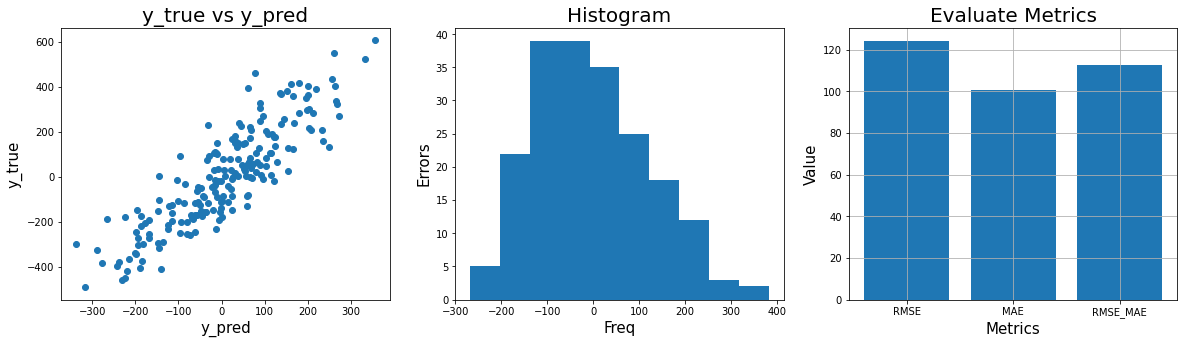

In [53]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

metrics_knn = evaluate_metrics(model = knn, 
                           X = X_test, 
                           y_true = y_test
                          )

evaluate_quality_models(model = knn, 
                        X = X_test, 
                        y_true = y_test, 
                        df_metrics = metrics_knn
                       )

### 2.5 SVM
Suport verctor regression

D:\Anaconda3\envs\data-science-gcp\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RMSE:  212.81802033327156
MAE:  172.37100645552746
MEAN_RMSE_MAE:  192.5945133943995


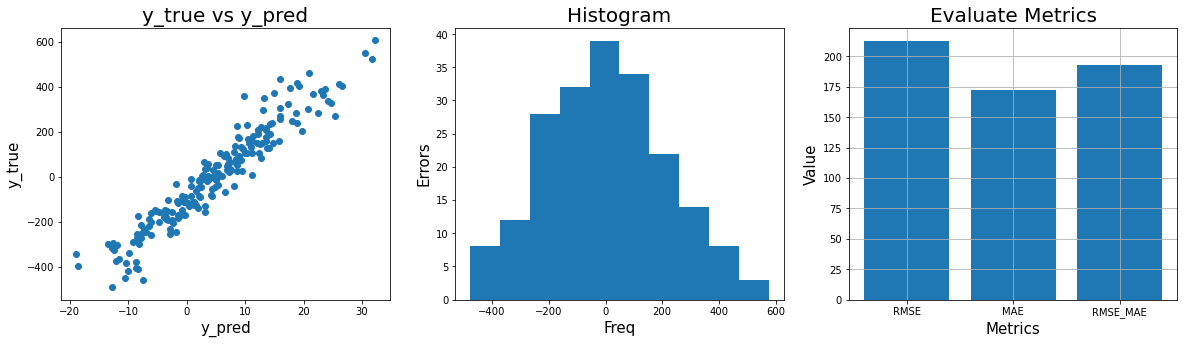

In [58]:
svr = SVR()

svr.fit(X_train, y_train)

metrics_svr = evaluate_metrics(model = svr, 
                           X = X_test, 
                           y_true = y_test
                          )

evaluate_quality_models(model = svr, 
                        X = X_test, 
                        y_true = y_test, 
                        df_metrics = metrics_svr
                       )

### 2.6 XGBOOST

In [12]:
# ! pip install xgboost

RMSE:  96.93264031953004
MAE:  76.07411192166748
MEAN_RMSE_MAE:  86.50337612059876


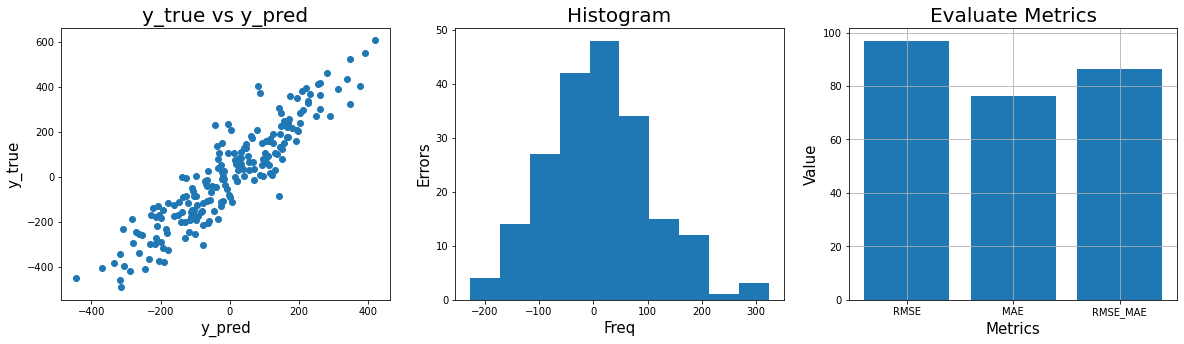

In [13]:
xgb = xgboost.XGBRegressor(random_state = 42)

xgb.fit(X_train, y_train)

metrics_xgb = evaluate_metrics(model = xgb, 
                           X = X_test, 
                           y_true = y_test
                          )

evaluate_quality_models(model = xgb, 
                        X = X_test, 
                        y_true = y_test, 
                        df_metrics = metrics_xgb
                       )

### 2.7 lightgbm

In [14]:
# ! pip install lightgbm

RMSE:  75.35574438004164
MAE:  59.36475622661192
MEAN_RMSE_MAE:  67.36025030332678


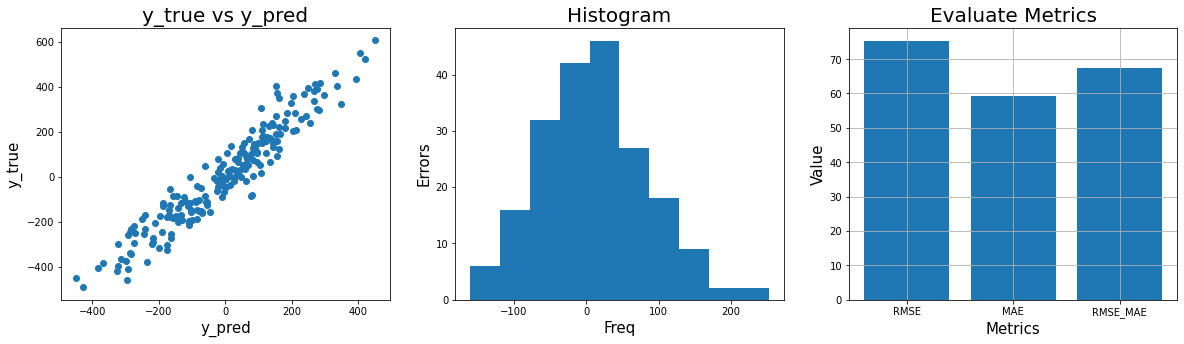

In [15]:
ltb_reg = ltb.LGBMRegressor(random_state = 42)

ltb_reg.fit(X_train, y_train)

metrics_ltb_reg = evaluate_metrics(model = ltb_reg, 
                           X = X_test, 
                           y_true = y_test
                          )

evaluate_quality_models(model = ltb_reg, 
                        X = X_test, 
                        y_true = y_test, 
                        df_metrics = metrics_ltb_reg
                       )

### 2.8 Try HP tunning (with 5Folds) in the Random Forest Model

In [16]:
# params to hp tunning
parameters_grid = {
    'n_estimators': [5, 10, 25, 50, 100, 150, 200],
    'min_samples_split': [0.01, 0.05, 0.05, 0.10, 0.15, 0.20],
    'min_samples_leaf': [0.01, 0.05, 0.05, 0.10, 0.15, 0.20]
}

In [17]:
# base model model
rf = RandomForestRegressor(random_state = 42)

In [18]:
rf_cv = GridSearchCV(estimator = rf, 
                     param_grid = parameters_grid, 
                     cv= 5,
                     scoring = 'neg_mean_absolute_error',
                     n_jobs = -1,
                     verbose = 1
                    )

In [19]:
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


D:\Anaconda3\envs\data-science-gcp\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [0.01, 0.05, 0.05, 0.1, 0.15, 0.2],
                         'min_samples_split': [0.01, 0.05, 0.05, 0.1, 0.15,
                                               0.2],
                         'n_estimators': [5, 10, 25, 50, 100, 150, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

RMSE:  121.52157952490339
MAE:  96.70132395257853
MEAN_RMSE_MAE:  109.11145173874095


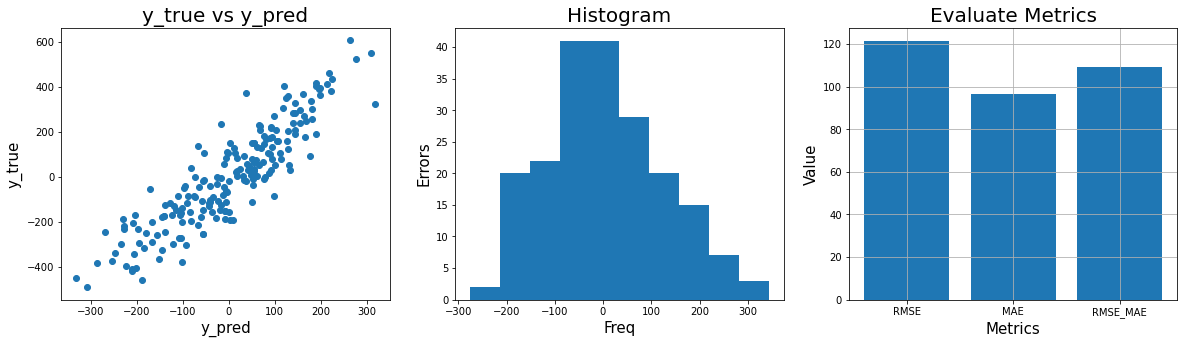

In [20]:
metrics_rf_cv = evaluate_metrics(model = rf_cv, 
                           X = X_test, 
                           y_true = y_test
                          )

evaluate_quality_models(model = rf_cv, 
                        X = X_test, 
                        y_true = y_test, 
                        df_metrics = metrics_rf_cv
                       )

In [21]:
rf_cv.best_params_

{'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 200}

### 2.8 Compare metrics

In [22]:
# obs: it is a little harcoded

# metrics_lr
# metrics_cart
# metrics_rf
# metrics_knn
# metrics_svr
# metrics_xgb
# metrics_ltb_reg
# metrics_rf_cv

In [23]:
# rename column
metrics_lr.rename({'metric_value': 'metric_value_lr'}, axis = 1, inplace = True)
metrics_cart.rename({'metric_value': 'metric_value_cart'}, axis = 1, inplace = True)
metrics_rf.rename({'metric_value': 'metric_value_rf'}, axis = 1, inplace = True)
metrics_knn.rename({'metric_value': 'metric_value_knn'}, axis = 1, inplace = True)
metrics_svr.rename({'metric_value': 'metric_value_svr'}, axis = 1, inplace = True)
metrics_xgb.rename({'metric_value': 'metric_value_xgb'}, axis = 1, inplace = True)
metrics_ltb_reg.rename({'metric_value': 'metric_value_ltb'}, axis = 1, inplace = True)
metrics_rf_cv.rename({'metric_value': 'metric_value_rf_cv'}, axis = 1, inplace = True)

In [24]:
# transpose dataframes
metrics_lr = metrics_lr.T
metrics_cart = metrics_cart.T
metrics_rf = metrics_rf.T
metrics_knn = metrics_knn.T
metrics_svr = metrics_svr.T
metrics_xgb = metrics_xgb.T
metrics_ltb_reg = metrics_ltb_reg.T
metrics_rf_cv = metrics_rf_cv.T

In [25]:
# append in only dataframe
metrics = pd.DataFrame()
metrics = metrics.append(metrics_lr)
metrics = metrics.append(metrics_cart)
metrics = metrics.append(metrics_rf)
metrics = metrics.append(metrics_knn)
metrics = metrics.append(metrics_svr)
metrics = metrics.append(metrics_xgb)
metrics = metrics.append(metrics_ltb_reg)
metrics = metrics.append(metrics_rf_cv)

In [26]:
metrics

,RMSE,MAE,RMSE_MAE
metric_value_lr,0.103388,0.077390,0.090389
metric_value_cart,173.796049,139.441157,156.618603
metric_value_rf,114.321232,91.241054,102.781143
metric_value_knn,124.345780,100.801996,112.573888
metric_value_svr,212.818020,172.371006,192.594513
metric_value_xgb,96.932640,76.074112,86.503376
metric_value_ltb,75.355744,59.364756,67.360250
metric_value_rf_cv,121.521580,96.701324,109.111452


In [27]:
metrics.sort_values(['RMSE_MAE'], ascending = True)

,RMSE,MAE,RMSE_MAE
metric_value_lr,0.103388,0.077390,0.090389
metric_value_ltb,75.355744,59.364756,67.360250
metric_value_xgb,96.932640,76.074112,86.503376
metric_value_rf,114.321232,91.241054,102.781143
metric_value_rf_cv,121.521580,96.701324,109.111452
metric_value_knn,124.345780,100.801996,112.573888
metric_value_cart,173.796049,139.441157,156.618603
metric_value_svr,212.818020,172.371006,192.594513


### 3. Explory Cross-Validation to evaluate te quality of the model
- In this part I use cross-validation in the train dataset to train the same architecture of the models with diferent samples of the train data and having a metric of each sample and then have a better estimation of the quality of the model.

- For example if I use 5 folds cross validation, I can train 5 models with differents samples of the train data and have 5 values of metrics, then I can evaluate the distribution of these metrics and have a better estimation of the quality of the model


- **Repeated Kfolds** to make multiples Folds. For example 5Folds but I repeat the generation of folds for example 3 times, getting finally 15folds (5folds repeated 3 times). I use that in this example because I want to have more amount of metrics (for example 30 values, 3 repetions of 10Folds) and calculate the distribution of the metric

- **cross_val_score** to get the scores of each FOLD (using the test data of each fold), **IMPORTANT** this function FIT THE MODELS. So, this function divide the data in KFolds and fit the model for each Fold and return the metric using the test data of each Fold. **IMPORTANT 2** this function only calculate the metric of each fold (after training in each fold) but don't do HP tunning.

In [28]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [29]:
# EXAMPLE OF RKF - get different splits of the train data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([11, 22, 33, 44])
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=42)

for train_index, test_index in rkf.split(X):
    print('train_index: ', train_index)
    print('test_index: ', test_index)

train_index:  [0 2]
test_index:  [1 3]
train_index:  [1 3]
test_index:  [0 2]
train_index:  [0 2]
test_index:  [1 3]
train_index:  [1 3]
test_index:  [0 2]


In [30]:
# EXAMPLE OF cross-val-score
# You define the number of Folds and split the data, for each fold you train the model and get the value of the metric using
# the test data. For example, if you define 3Folds, you get 3 metrics. After that you could average the metric and say WITH 
# X MODEL the metric is X.

diabetes_df = datasets.load_diabetes()
X = diabetes_df.data[:150]
y = diabetes_df.target[:150]
lasso = linear_model.Lasso()
cross_val_score(lasso, X, y, cv=3, scoring = 'neg_root_mean_squared_error')

array([-60.29520315, -59.77744074, -78.19707345])

In [31]:
# EXAMPLE CALCULATING SCORES (using the random forest)

# defining a CV SPLITTER (repeated K folds)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# getting the scores for each FOLD
scores = cross_val_score(rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
scores = - scores

D:\Anaconda3\envs\data-science-gcp\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\envs\data-science-gcp\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\envs\data-science-gcp\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\envs\data-science-gcp\lib\site-packages\sklearn\model_selection\_validation.py:598: Dat

D:\Anaconda3\envs\data-science-gcp\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\envs\data-science-gcp\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [32]:
# print values of scores
scores

array([115.21241805, 121.13263753, 115.06944289, 118.21376335,
       114.20220996, 118.19611638, 116.23505605, 115.58781493,
       125.7643703 , 120.15080326, 102.54079962, 110.25738418,
       119.09889112, 130.89017286, 103.89103928, 101.51640743,
       135.20651512, 132.46635053, 113.04369442, 110.97001691,
       107.5557503 , 116.56121584, 112.00553688, 118.52650444,
       122.75272211, 121.8006064 , 125.65598199, 117.20503322,
       118.32074935, 117.07421828])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9086b1820>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9086b1e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9086b1430>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9086bc5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9086bc970>],
 'means': []}

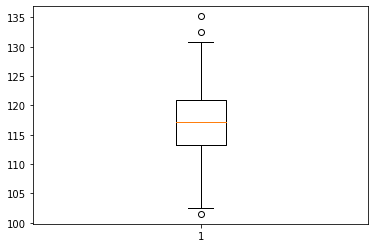

In [33]:
# make a boxplot to see the distrbution of the errors
plt.boxplot(scores)

In [34]:
# stop

### EXTRA. ESTUDING METHODS TO HP TUNNING WITH CROSS-VALIDATION
- In this example I define a space of hiperparameters of 8 combinations (3 parameters with 2 options of each one)

In [35]:
# params to hp tunning
parameters_grid = {
    'n_estimators': [5, 10],
    'min_samples_split': [0.01, 0.05],
    'min_samples_leaf': [0.01, 0.05]
}

number_kfolds = 3

#### FORM 1. TUNNING WITH CV USING GRID SEARCH
- I use the function Grid Search CV to define the params and the number of folds (in this function INS'T NECESSARY DEFINE CV, it can be set in None)
- How its work?:
    - Step 1: Generate the K Folds. For example 3 folds
    - Step 2: For each Fold make the hp tunning.
    - Step 3: Get the value of each hp (the mean of hp tunning across each fold)
    - Example: In this example The grid has 8 combinations (condidates), so I need to fit 8 different models (the same architecture of the model with different hiperparameters) and the model trained with best metric in valid data is the selected. So, including the Cross validation I generate 3 folds (3 datasets of train and valid) and for EACH FOLD I need to train the 8 models. Finally I fit 3 folds with each fold have 8 candidates, totally I fit 24 models. Then to calculate the metric of each 8 models (that represent the combination of hp tunning parameters) I need to calculate the average across each fold (hp combination 1 in fold 1 + hp combination 1 in fold 2 + hp combination 1 in fold 3 / Number of folds)

In [36]:
# base model model
rf_form1 = RandomForestRegressor(random_state = 42)

In [37]:
rf_cv_form1 = GridSearchCV(estimator = rf_form1, 
                     param_grid = parameters_grid, 
                     cv= number_kfolds,
                     scoring = 'neg_mean_absolute_error',
                     n_jobs = -1,
                     verbose = 1
                    )

rf_cv_form1.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


D:\Anaconda3\envs\data-science-gcp\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [0.01, 0.05],
                         'min_samples_split': [0.01, 0.05],
                         'n_estimators': [5, 10]},
             scoring='neg_mean_absolute_error', verbose=1)

In [38]:
results = rf_cv_form1.cv_results_
results

{'mean_fit_time': array([0.02609348, 0.04557323, 0.02533237, 0.04700152, 0.02200333,
        0.05233272, 0.0226632 , 0.03199752]),
 'std_fit_time': array([1.69969035e-03, 2.37867114e-03, 4.71477126e-03, 7.11805028e-03,
        8.14492707e-04, 3.29811540e-03, 2.49417451e-03, 1.23630756e-06]),
 'mean_score_time': array([0.00400098, 0.00700347, 0.00466871, 0.00700156, 0.00633383,
        0.00333182, 0.00400027, 0.00433397]),
 'std_score_time': array([7.86741172e-07, 2.16104712e-03, 4.70529118e-04, 2.16285305e-03,
        1.70105256e-03, 4.72269527e-04, 8.18190185e-04, 1.24706502e-03]),
 'param_min_samples_leaf': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.05, 0.05, 0.05, 0.05],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[0.01, 0.01, 0.05, 0.05, 0.01, 0.01, 0.05, 0.05],
              mask=[False, False, False, False, False, False, False, False],
        fill_

- Getting the best estimator

In [39]:
# BEST HIPERPARAMETERS (dictionary with the best parameters)
rf_cv_form1.best_params_ 

{'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 10}

In [40]:
# BEST MODEL (model trained with the best parameters, the model is TRAINED WITH ALL the DATA). the artifact model is returned
rf_cv_form1.best_estimator_ 

RandomForestRegressor(min_samples_leaf=0.01, min_samples_split=0.01,
                      n_estimators=10, random_state=42)

- Getting best score using param of the class

In [41]:
# BEST SCORE: Mean cross-validated score of the best_estimator
rf_cv_form1.best_score_

-108.12052568447075

- Get best score: calculating the average of metric of each HP combination across each Fold

In [42]:
# number of combinations of HP
number_hp_combinations = 8

# initilize array with mean of metrics of each hp combination across each kfolds
results_hp_in_fold = np.zeros(number_hp_combinations)

# sum metric of each hp combination across each fold
for index_fold in range(number_kfolds):
    print(index_fold)
    results_hp_in_fold += results[f'split{index_fold}_test_score']
    
# divide the sum of metric for the number of folds
results_hp_in_fold = results_hp_in_fold / number_kfolds


# transform to positive value
results_hp_in_fold = -results_hp_in_fold

0
1
2


In [43]:
# results
results_hp_in_fold

array([117.10382554, 108.12052568, 121.21775155, 114.60153458,
       129.70607403, 126.90988319, 129.70607403, 126.90988319])

In [44]:
# index of combination with best metric
results_hp_in_fold.argmin()

1

In [45]:
# VALUE of metric of combination with best metric
results_hp_in_fold.min()

108.12052568447075

In [46]:
# combination with best metric
results['params'][results_hp_in_fold.argmin()]

{'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 10}